# Visualising Airbnb Data in New Orleans, Louisiana
An investigation into Inside Airbnb watchdog data by Jaume Clave.

February 10th, 2020

## Project Description 
This Jupyter Notebook contains Python code used to explore, model and visualise the Airbnb market in New Orleans, Louisiana. 
The data has been sourced from Inside Airbnb, an investigatory/watchdog website launched in 2016 that aims to bring transparaency into the obaque world of Airbnbs "sharing economy".  The data behind the Inside Airbnb site is sourced from publicly available information from the Airbnb site. The data has also been analyzed, cleansed and aggregated where appropriate to faciliate public discussion. This project uses all publically available New Orleans data from 2015 to 2020.

New Orleans is a consolidated city-parish located along the Mississippi River in the southeastern region of the U.S. state of Louisiana. Serving as a major port, New Orleans is considered an economic and commercial hub for the broader Gulf Coast region of the United States. New Orleans is world-renowned for its distinct music, Creole cuisine, unique dialect, and its annual celebrations and festivals, most notably Mardi Gras. The historic heart of the city is the French Quarter, known for its French and Spanish Creole architecture and vibrant nightlife along Bourbon Street. The city has been described as the "most unique" in the United States, owing in large part to its cross-cultural and multilingual heritage.

The report aims to help potential visitors of the city a data-driven presentation into their Airbnb rental options. Helping them answer, where to stay, when to come and what type of property to rent.
Recommendations discussed include:   

    Favoring small and medium houses for greatest amount of property choices
    Booking properties in neighborhoods with the best sentiment – price ratio so as to optimize value for money  
    Avoiding dates with higher occupancy rates, unless attending events, as dates correlate with price   
    
The report appreciates the fact that the analysis conducted has limitations. Some of the limitations include: forecasting figures are likely to change as property owners adjust prices throughout the year.

## Index

[Airbnb in NOLA](#Airbnb-in-NOLA)  
i. [Economic Contributions in NOLA from Airbnb](#Economic-Contributions-in-NOLA-from-Airbnb)  
ii. [NOLAs Most Expensive Neighbourhoods](#NOLAs-Most-Expensive-Neighbourhoods)  
iii. [Occupany Rate in NOLA](#Occupany-Rate-in-NOLA)  
iv. [Average Room Price per Night of Week](#Average-Room-Price-per-Night-of-Week)  
v. [Nightly Average Prices for a Calendar Year in NOLA](#Nightly-Average-Prices-for-a-Calendar-Year-in-NOLA)  
vi. [Most Popular Airbnb Property Types](#Most-Popular-Airbnb-Property-Types)  
vii. [Average Nightly Price per Property Type](#Average-Nightly-Price-per-Property-Type)  
viii. [Neighbourhood Review Sentiment Analysis](#Neighbourhood-Review-Sentiment-Analysis)  

[Conclusion](#Conclusion)  
[Further Reading](#Further-Reading)

## Airbnb in NOLA

In [1]:
## Load and import required libraries. Resest matplotlib theme back to default
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import warnings
warnings.filterwarnings('ignore')

### Economic Contributions in NOLA from Airbnb
The first graph explores the economic impact of Airbnb in the New Orleans area. It shows the amount spent by Airbnb customers in New Orleans from 2015 to the end of 2019, by quarter. The graph also shows the amount of money, per quarter, Airbnb owners keep, Airbnb makes, and how much money the City of New Orleans makes from Airbnb taxes.  The graph is titled "Economic Contributions from Airbnb Service" and it uses the calander.csv.gz files found on the Inside Airbnb site. These files have four columns; listing_id, date, available and price.

The data was loaded, and transformed. Revenue was calculated by summing the per night price all the proerpties booked for a certain day. This was then aggregated for each quarter in the year.

In [2]:
def clean_data(csv, mean):
    df = pd.read_csv(csv, encoding='ISO-8859-1')
    df = df.replace('t', True)
    df = df.replace('TRUE', True)
    df = df.replace('f', False)
    df = df.replace('FALSE', False)
    df['price'] = df['price'].fillna(mean)
    df['price'] = df['price'].astype(str)
    df['price'] = df['price'].apply(lambda x: x.replace('$',''))
    df['price'] = df['price'].apply(lambda x: x.replace(',',''))
    df['price'] = df['price'].astype(float)
    df['price'] = df['price'].astype(int)
    df['owner'] = df['price'] * 0.8
    df['airbnb'] = df['price'] * 0.15
    df['city'] = df['price'] * 0.05
    df['date'] = pd.to_datetime(df['date'])
    df['quater'] = df['date'].dt.quarter
    df['year'] = df['date'].dt.year
    df['Q-Y'] = df['quater'].astype(str) + '-' + df['year'].astype(str)
    return df

def merge_clean_data(csv1, csv2, mean):
    csv1 = pd.read_csv(csv1, encoding='ISO-8859-1')
    csv2 = pd.read_csv(csv2, encoding='ISO-8859-1')
    df = pd.concat([csv1, csv2])
    df = df.replace('t', True)
    df = df.replace('TRUE', True)
    df = df.replace('f', False)
    df = df.replace('FALSE', False)
    df['price'] = df['price'].fillna(mean)
    df['price'] = df['price'].astype(str)
    df['price'] = df['price'].apply(lambda x: x.replace('$',''))
    df['price'] = df['price'].apply(lambda x: x.replace(',',''))
    df['price'] = df['price'].astype(float)
    df['price'] = df['price'].astype(int)
    df['owner'] = df['price'] * 0.8
    df['airbnb'] = df['price'] * 0.15
    df['city'] = df['price'] * 0.05
    df['date'] = pd.to_datetime(df['date'])
    df['quater'] = df['date'].dt.quarter
    df['year'] = df['date'].dt.year
    df['Q-Y'] = df['quater'].astype(str) + '-' + df['year'].astype(str)
    return df

In [3]:
## Load 'jan1-nov2.csv' and 'nov3-dec31.csv' from Jupyter memory, concatinate them and clean the data sets
## Create new stakeholder features used for analysis 
df19 = merge_clean_data('jan1-nov2.csv', 'nov3-dec31.csv', 197)

## 2018 Year DataFrame and Processing
df18 = clean_data('2018_cal.csv', 204)

## 2017 Year DataFrame and Processing
df17 = clean_data('2017_cal.csv', 175)

## 2016 Year DataFrame and Processing
df16 = clean_data('2016_cal.csv', 200)

## 2015 Year DataFrame and Processing
df15 = clean_data('2015_cal.csv', 215)

In [4]:
## Concatante all data sets from 2015 to 2019
dfys = pd.concat([df19, df18, df17, df16, df15])
dfys['Q-Y'] = dfys['Q-Y'].astype(str)

## For each quarter since 2015 sum the approperiate coloumn to calculate customer spend, owner, Airbnb
## and City revenue
quaters = ['1-2015', '2-2015', '3-2015', '4-2015', '1-2016', '2-2016', '3-2016', '4-2016', 
           '1-2017', '2-2017', '3-2017', '4-2017', '1-2018', '2-2018', '3-2018', '4-2018', 
           '1-2019', '2-2019', '3-2019', '4-2019']
owner = []
airbnb = []
city = []
customer = []
room_price = []
d = {}

for quater in quaters:
    q = dfys['Q-Y'] == quater
    q = dfys[q]
    false = q['available'] == False
    false = q[false]
    owner.append(false['owner'].sum())
    airbnb.append(false['airbnb'].sum())
    city.append(false['city'].sum())
    customer.append(false['price'].sum())
    room_price.append(false['price'].mean())

## Create data frame containing information calculated above    
at_quarterly_rev = pd.DataFrame({'quater' : quaters, 'owner_revenue' : owner, 'airbnb_revenue' : airbnb,
                             'city_revenue' : city, 'customer_spend' : customer, 
                                 'room_price' : room_price})

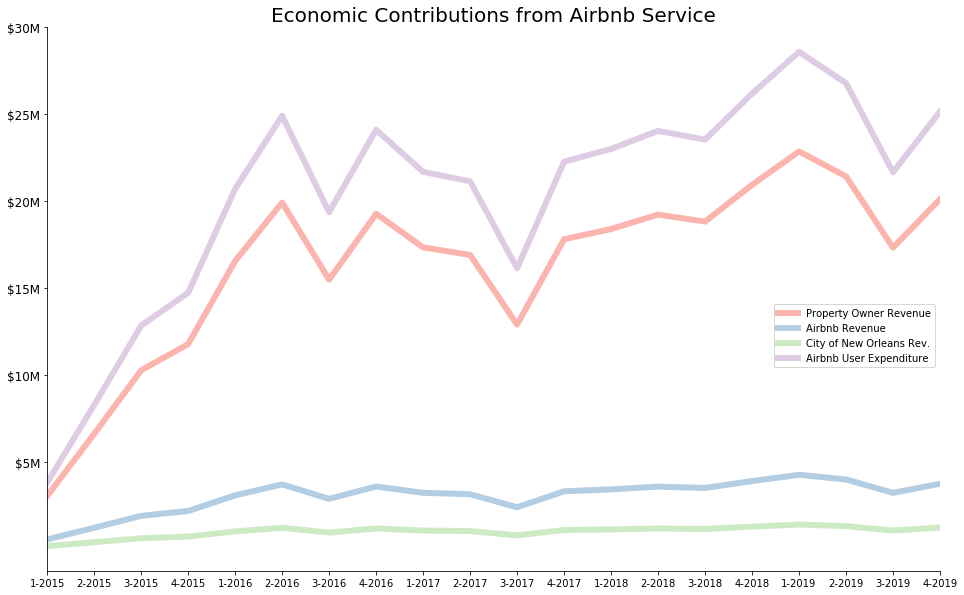

In [5]:
## Plot graph from data frame
q = ['1-2015', '2-2015', '3-2015', '4-2015', '1-2016', '2-2016', '3-2016', '4-2016', 
    '1-2017', '2-2017', '3-2017', '4-2017', '1-2018', '2-2018', '3-2018', '4-2018', 
    '1-2019', '2-2019', '3-2019', '4-2019']
c = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4']

mylabels = ['Property Owner Revenue','Airbnb Revenue','City of New Orleans Rev.','Airbnb User Expenditure', 'ddsfsd']
ax = at_quarterly_rev[['owner_revenue', 'airbnb_revenue', 'city_revenue', 
                    'customer_spend']].plot(kind = 'line', color = c, figsize=(20,10), 
                                            linewidth = 6, mec = 'black')
plt.yticks([5000000, 10000000, 15000000, 20000000, 25000000, 30000000], ['$5M','$10M','$15M',
                                                                         '$20M', '$25M', '$30M'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(q, rotation='horizontal')
plt.title('Economic Contributions from Airbnb Service', size = 20)
plt.yticks([5000000, 10000000, 15000000, 20000000, 25000000, 30000000], ['$5M','$10M','$15M',
                                                                         '$20M', '$25M', '$30M'], 
           size = 12)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], size = 10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='best', bbox_to_anchor=(1, 0.5), labels = mylabels)
plt.show()

### NOLAs Most Expensive Neighbourhoods
The second graph explored shows the average price per Airbnb property, per night, in each neighborhood of the New Orleans area. It looks at late 2019 year data  to late 2020 year data. The graph is titled "Which Neighborhoods are Most Expensive" and it uses the calander.csv.gz and the neighbourhoods.geojson files found on the Inside Airbnb site. These files have six columns; listing_id, date, available, price, neighborhood name and geometry.

The data was loaded, and transformed. The map is plotted using geopandas and the geojson containing the multipolygom that holds the latittude and longitude of each neighborhood. A function called "explode" is used to turn the multipolygom into a polygom so that each neighborhood name can be plotted exactly in the middle of the area it is named after. The darker green the area in the chart is, the more expensive the area is to stay in. Only neighborhoods with average nightly prices of over 200 USD are labeled to avoid crowding.

In [6]:
## Load 'no_listings_19_clean.csv' from Jupyter memory
data = pd.read_csv('no_listings_19_clean.csv', encoding='ISO-8859-1')
data.head(5)

## Load 'neighbourhoods.geojson' from Jupyter memory and drop regions which are not of interest because 
## they are located in the outskirts of New Orleans
nb = 'neighbourhoods.geojson'
regions = gpd.read_file(nb)
regions
drop_regions = ['Lake Catherine', 'Village De Lest', 'Viavant - Venetian Isles', 'Read Blvd East',
               'Read Blvd West', 'West Lake Forest', 'Plum Orchard', 'Pines Village', 'Little Woods',
               'New Aurora - English Turn', 'Old Aurora', 'Tall Timbers - Brechtel']

In [7]:
## Function used to explode moltipolygom to polygom needed for area labeling
def explode(gdf):
    """ 
    Explodes a geodataframe 
    
    Will explode muti-part geometries into single geometries. Original index is
    stored in column level_0 and zero-based count of geometries per multi-
    geometry is stored in level_1
    
    Args:
        gdf (gpd.GeoDataFrame) : input geodataframe with multi-geometries
        
    Returns:
        gdf (gpd.GeoDataFrame) : exploded geodataframe with a new index 
                                 and two new columns: level_0 and level_1
        
    """
    gs = gdf.explode()
    gdf2 = gs.reset_index().rename(columns={0: 'geometry'})
    gdf_out = gdf2.merge(gdf.drop('geometry', axis=1), left_on='level_0', right_index=True)
    gdf_out = gdf_out.set_index(['level_0', 'level_1']).set_geometry('geometry')
    gdf_out.crs = gdf.crs
    return gdf_out

In [8]:
## Count number of Airbnb Superhots per neighbourhood
data['count'] = data['host_is_superhost'] == True
df_sh = pd.concat([data['neighbourhood_cleansed'], data['count']], axis = 1)
df_sh = df_sh.groupby('neighbourhood_cleansed')['count'].sum().astype(int)
df_sh = pd.DataFrame(df_sh)
df_sh = df_sh.reset_index()
merged = regions.set_index('neighbourhood').join(df_sh.set_index('neighbourhood_cleansed'))
merged = merged.reset_index()
merged[['neighbourhood', 'geometry', 'count']]
merged = pd.concat([merged, data['longitude'], data['latitude']], axis = 1)
merged = merged.drop('neighbourhood_group', 1)
merged = merged[~merged['neighbourhood'].isin(drop_regions)]

## Find Lat/Long of each neighourhood using for loop on multipolygom
neighbourhood_names = data['neighbourhood_cleansed'].unique()
neighbourhood_names
longitude = []
latitude = []
neighborhood = []

for city in neighbourhood_names:
    city = data['neighbourhood_cleansed'] == city
    city = data[city]
    longitude.append(city['longitude'].mean())
    latitude.append(city['latitude'].mean())

## Create DataFrame containing neighborhood name and its latitude and longitude values
lat_long = pd.DataFrame({'neighbourhood' : neighbourhood_names, 'longitude' : longitude,
                         'latitude' : latitude})

## Merge superhost count data frame with lat_long data frame
merged_2 = merged.drop(['longitude', 'latitude'], axis = 1)
label_df = merged_2.set_index('neighbourhood').join(lat_long.set_index('neighbourhood'))
label_df = label_df.reset_index()
label_df = label_df[~label_df['neighbourhood'].isin(drop_regions)]
data['count'] = data['neighbourhood_cleansed']
df_sh1 = pd.concat([data['neighbourhood_cleansed'], data['count']], axis = 1)
df_sh1 = df_sh1.groupby('neighbourhood_cleansed')['count'].count().astype(int)
df_sh1 = pd.DataFrame(df_sh1)
df_sh1 = df_sh1.reset_index()

## Creating a "for" loop used to find the average price per neighborhood that will be mapped
neighbourhood_names = data['neighbourhood_cleansed'].unique()
neighbourhood_names
mean_price = []
neighborhood = []

for city in neighbourhood_names:
    city = data['neighbourhood_cleansed'] == city
    city = data[city]
    mean_price.append(city['price'].mean())

## Creating data frame and placing "for" loop data into it
mean_price = pd.DataFrame({'neighbourhood' : neighbourhood_names, 'price' : mean_price})

merged_3 = label_df.drop(['count'], axis = 1)
price_label_df = merged_3.set_index('neighbourhood').join(mean_price.set_index('neighbourhood'))
price_label_df = price_label_df.reset_index()
price_label_df = price_label_df[~price_label_df['neighbourhood'].isin(drop_regions)]
price_label_df1 = price_label_df.set_index('neighbourhood').join(df_sh1.set_index('neighbourhood_cleansed'))
price_label_df1 = price_label_df1.reset_index()
price_label_df1 = price_label_df1.rename(columns = {'index':'neighbourhood'})
price_label_df1 = price_label_df1[~price_label_df1['neighbourhood'].isin(drop_regions)]
p_label = price_label_df1['count'] >= 0
p_label = price_label_df1[p_label]

## Exploding multipolygom geometry using the function listed above and creating a data frame
single_p_label = explode(p_label)

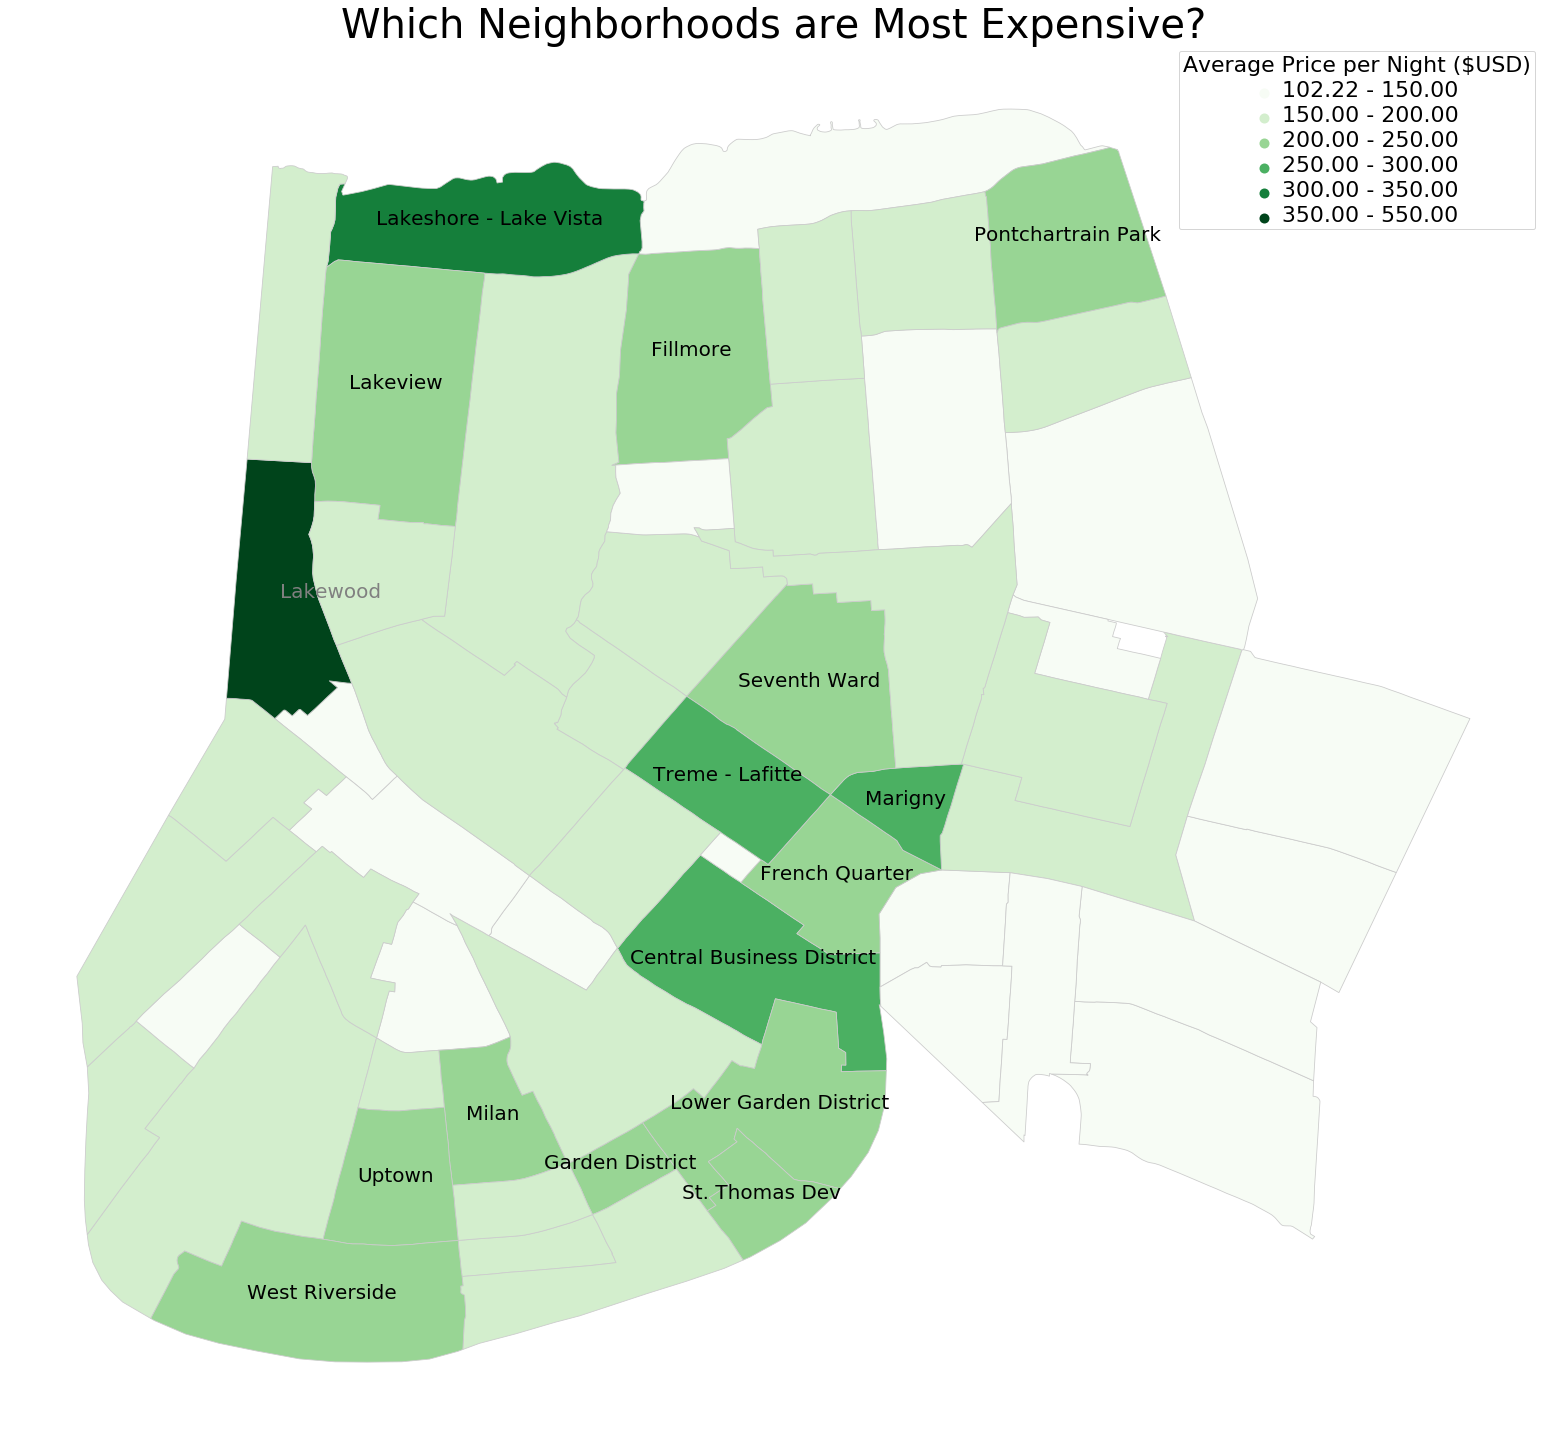

In [9]:
## Creating and loading spatial map plot
fig, ax = plt.subplots(1, figsize = (40, 20))
ax.axis('off')
ax.set_title('Which Neighborhoods are Most Expensive?', fontdict = {'fontsize' : '40',
                                                                                  'fontweight' : '3'})
## Create normalized color bar
color = 'Greens'

ax = single_p_label.plot('price_x', cmap = color, linewidth = 0.8, ax = ax, edgecolor = '0.8', figsize = (40,20),
            scheme = "User_Defined", legend = True,
            classification_kwds = dict(bins = [150, 200, 250, 300, 350, 550]), 
            legend_kwds={'loc': 'best', 'title' : 'Average Price per Night ($USD)'})
plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.setp(ax.get_legend().get_title(), fontsize='22')

## Add data labels to neighbourhoods with average nightly prices > 200 USD
for idx, row in p_label.iterrows():
    if(row['price'] > 200 and row['price'] < 350):
        plt.annotate(s = row['neighbourhood'], xy = row.geometry.centroid.coords[0], 
                                    ha ='center', size = 20, color = 'black')

for idx, row in p_label.iterrows():
    if(row['price'] > 350):
        plt.annotate(s = row['neighbourhood'], xy = row.geometry.centroid.coords[0], 
                                    ha ='left', size = 20, color = 'grey')
 
fig.tight_layout()
plt.show()

### Occupany Rate in NOLA
The third graph explored shows the occupancy rate, per night, in a calendar visualisation. It looks at the entire 2019 year. The graph is titled "Occupancy Rate (%) in New Orleans" and it uses the calander.csv.gz on the Inside Airbnb site. Each months calander.csv.gz file was downloaded and compiled together to ensure the most accurate of data since these files show predictions for up to one year in the future. These files have four columns; listing_id, date, available, price. 

The data was loaded, and transformed. The calendar map is plotted using the calmap library and calculated occupancy rate per day (count of rooms occupied / counht of total rooms). The darker red the day in the chart is, the higher the occupancy rate is. There are some time periods such as Mardi Gras, the April Jazz Festival, 4th of July and New Years where occupancy is especially high.

In [10]:
## Load 'jan1-nov2.csv' and 'nov3-dec31.csv' from Jupyter memory, concatinate them and clean the data sets.
df19 = pd.read_csv('jan1-nov2.csv', encoding='ISO-8859-1') 
nd = pd.read_csv('nov3-dec31.csv', encoding='ISO-8859-1')
df19 = pd.concat([df19, nd])
df19 = df19.replace('t', True)
df19 = df19.replace('TRUE', True)
df19 = df19.replace('f', False)
df19 = df19.replace('FALSE', False)

In [11]:
## Calculate mean occupancy rate per day using a "for" loop for the 2019 year
import calmap
from datetime import date, timedelta

dates_jn = []
prices = []
occ_jn = []

start_date = date(2019, 1, 1)
end_date = date(2019, 12, 31)
delta = timedelta(days=1)
while start_date <= end_date:
    dates_jn.append(start_date.strftime("%d/%m/%Y"))
    start_date += delta
    
for date in dates_jn:
    date = df19['date'] == date
    date = df19[date]
    false = date['available'] == False
    false = date[false]
    false_count = false.shape[0]
    total = date.shape[0]
    occ_jn.append((false_count / total) *100)

## Turn to data frame into pandas data series needed to plot with the calmap library
occ19_rate = pd.DataFrame({'dates_jn' : dates_jn, 'occupancy_rate' : occ_jn,})
ts19 = pd.Series(data=occ_jn, index=pd.to_datetime(dates_jn))

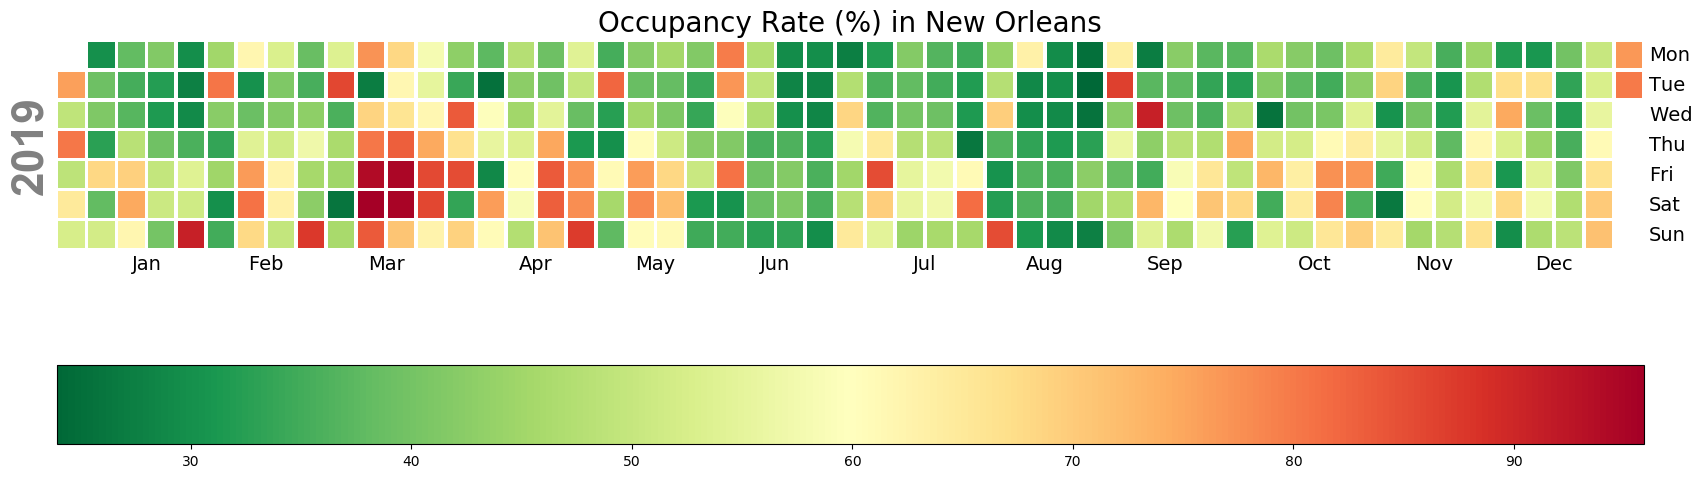

In [12]:
## Plot occupancy calendar heat map
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

fig,ax=calmap.calendarplot(ts19,
                    fillcolor = 'gray', linewidth = 2, cmap = 'RdYlGn_r',
                    fig_kws = dict(figsize = (17,8)), 
                           subplot_kws={'title': 'Occupancy Rate (%) in New Orleans'})
plt.title('Occupancy Rate (%) in New Orleans', size = 20)
plt.xticks(size = 14)
plt.yticks(size = 14)
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), orientation = 'h')
plt.show()

### Average Room Price per Night of Week
The fourth graph explored shows a box plot of average price, per night, for different days of the week. It looks at the entire 2019 year. The graph is titled "Boxplots of Price per Day of Week" and it uses the calander.csv.gz on the Inside Airbnb site. Each months calander.csv.gz file was downloaded and compiled together to ensure the most accurate of data since these files show predictions for up to one year in the future. These files have four columns; listing_id, date, available, price. 

The data was loaded, and transformed. The box plot is is plotted using the seaborn library.

In [13]:
## Ensuring all price numbers are added correctly 
df19['price'] = df19['price'].fillna(197)
df19['price'] = df19['price'].astype(str)
df19['price'] = df19['price'].apply(lambda x: x.replace('$',''))
df19['price'] = df19['price'].apply(lambda x: x.replace(',',''))
df19['price'] = df19['price'].astype(float)
df19['price'] = df19['price'].astype(int)

## Create new stakeholder features and convert 'quater' column into a dateTime type
df19['owner'] = df19['price'] * 0.8
df19['airbnb'] = df19['price'] * 0.15
df19['city'] = df19['price'] * 0.05
df19['date'] = pd.to_datetime(df19['date'])
df19['quater'] = df19['date'].dt.quarter

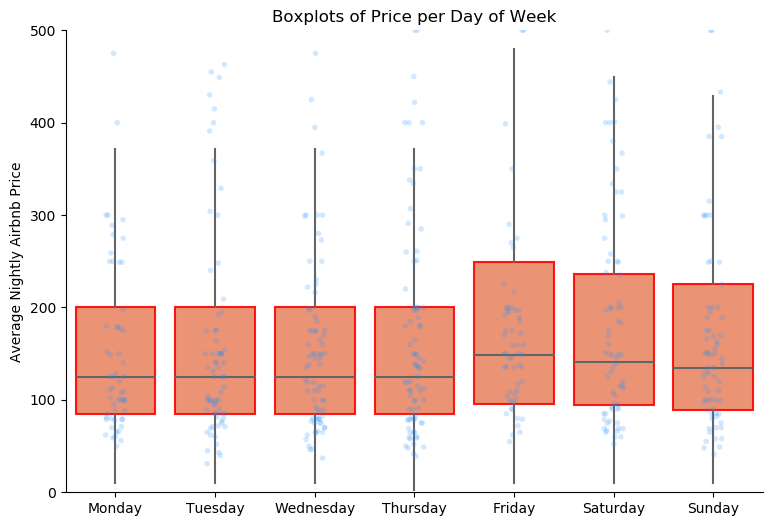

In [14]:
## Import required library and create new 'day of week' feature in data frame
import seaborn as sns
df19['weekday'] = df19['date'].dt.weekday_name
df19_box = pd.concat([df19['price'], df19['weekday']], axis = 1)

## Sample data frame to overlay data on the box plots
df19_box_sample = df19_box.sample(500)

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

## Create box plot using the seaborn library
fig = plt.figure(1, figsize = (9, 6))
ax = fig.add_subplot(111)
bp = sns.boxplot(y = 'price', x = 'weekday', data = df19_box, order = days_of_week, 
                 fliersize = 0, showcaps = False, color = 'coral', 
                 boxprops = dict(edgecolor = 'red', alpha = 0.9))
bplot=sns.stripplot(y = 'price', x = 'weekday', data = df19_box_sample, jitter = True, marker = 'o', 
                    alpha = 0.2, order = days_of_week, color = 'dodgerblue', size = 4)
ax.set_ylim([0, 500]) 
plt.yticks(np.arange(0, 501, step=100))
plt.ylabel('Average Nightly Airbnb Price')
plt.xlabel('')
plt.title('Boxplots of Price per Day of Week')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### Nightly Average Prices for a Calendar Year in NOLA
The fifth graph explored shows the average price per Airbnb property, per night, over the span late 2018 year to late 2019 year. The graph is titled "Average Airbnb Price per Day" and it uses the calander.csv.gz files found on the Inside Airbnb site. These files have four columns; listing_id, date, available and price.

The data was loaded, and transformed. A "for" loop was created to find the mean price per listing at a daily interval for the entire 2019 year.

In [15]:
## Load 'no_calendar_18_clean.csv' from memor
cal_18 = pd.read_csv('no_calendar_18_clean.csv', encoding='ISO-8859-1') 

## Turn data (date) feature in csv file to datetime for analysis
cal_18['date'] = pd.to_datetime(cal_18['date']) 
cal_18['day_of_week'] = cal_18['date'].dt.dayofweek 
cal_18['month'] = cal_18['date'].dt.month 
cal_18['year'] = cal_18['date'].dt.year 
cal_18['day'] = cal_18['date'].dt.weekday_name 

In [16]:
## Replace NaN rows with mean price
avg_price = cal_18['price'].mean()
values = {'price' : avg_price}
cal_18 = cal_18.fillna(value = values)

## Create list of dates from python library datetime
from datetime import date, timedelta

dates = []
prices = []

start_date = date(2018, 12, 6)
end_date = date(2019, 12, 5)
delta = timedelta(days=1)
while start_date <= end_date:
    dates.append(start_date.strftime("%Y-%m-%d"))
    start_date += delta
    
for date in dates:
    date = cal_18['date'] == date
    date = cal_18[date]
    prices.append(date['price'].mean())

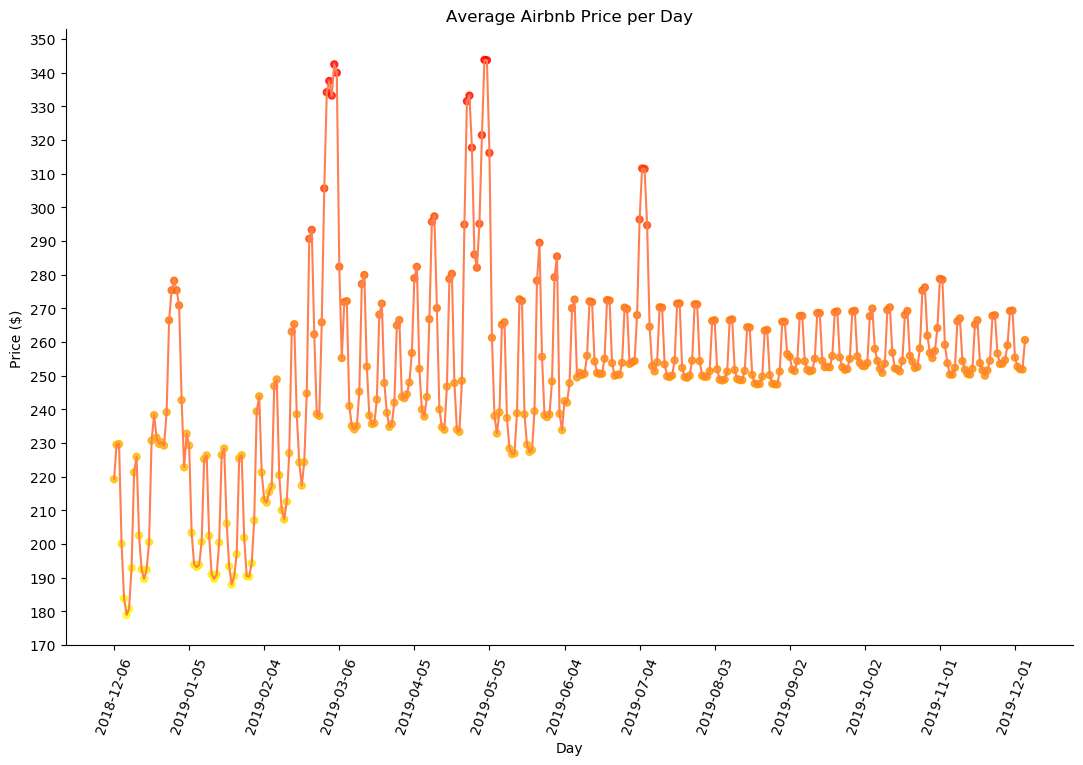

In [17]:
## Create DataFrame containing the dates and the mean price at that date
avg_price_df = pd.DataFrame({'day' : dates, 'avg_price' : prices})
x = avg_price_df['day']
y = avg_price_df['avg_price']

## Plot a line graph and highlight the daily intervals using a scatter plot
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.plot(x, y, c = 'coral', alpha = 1)
plt.scatter(x, y, c = y, cmap='autumn_r', s = 25, alpha = 0.8)
plt.xticks(np.arange(0 ,366, step=30), rotation=70)
plt.yticks(np.arange(170, 360, step=10))
plt.title('Average Airbnb Price per Day')
plt.xlabel('Day')
plt.ylabel('Price ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### Most Popular Airbnb Property Types
The sixth graph explored shows the make up of property type in New Orleans, 7 most listed neighborhoods. The graph is titled "New Orleans Most Popular Neighbourhood" and it uses the listings.csv.gz files found on the Inside Airbnb site. 

The data was loaded, and transformed. The 7 areas with most listed Airbnbs were determined and from these neighborhoods the house, apartment, condominium, guest_suite and townhouse property types were examined. A bar chart showing the percentage make up of each property type listing in the most popular neighborhoods.

In [18]:
## Find neighbourhoods with more than 300 unique count/listings
label_df.sort_values('count', ascending = False)
most_listings_df = label_df['count'] >= 150
most_listings_df = label_df[most_listings_df]
most_listings = most_listings_df['neighbourhood'].unique()

## Property Type by Neighbourhood
prop_df = pd.concat([data['neighbourhood_cleansed'], data['property_type']], axis = 1)
prop_df_listings = prop_df['neighbourhood_cleansed'].isin(most_listings)
prop_df_listings = prop_df[prop_df_listings]
property_type = prop_df['property_type'].unique()

## Dictionary counting amount of property types there are in New Orleans
count = {}
for prop in property_type:
    count[prop] = prop_df['property_type'].str.count(prop).sum()
    #count.append(prop_df['property_type'].str.count(prop).sum())

## Discover largest property counts
import heapq
largest5 = heapq.nlargest(5, count, key = count.get)

house = []
apartments = []
condominium = []
guest_suite = []
townhouse = []

for neighbourhood in most_listings:
    area = prop_df_listings['neighbourhood_cleansed'] == neighbourhood
    area = prop_df_listings[area]      
    house.append(area['property_type'].str.count('House').sum())
    apartments.append(area['property_type'].str.count('Apartment').sum())
    condominium.append(area['property_type'].str.count('Condominium').sum())
    guest_suite.append(area['property_type'].str.count('Guest suite').sum())
    townhouse.append(area['property_type'].str.count('Townhouse').sum())

## Create DataFrame
pop_areas = pd.DataFrame({'neighbourhood' : most_listings, 'house' : house, 'apartment' : apartments,
                         'condominium' : condominium, 'guest_suite' : guest_suite, 
                         'townhouse' : townhouse})

## Create % of Total Columns
pop_areas['sum'] = pop_areas.sum(axis = 1)
pop_areas['house_%'] = (pop_areas['house'] / pop_areas['sum']) * 100
pop_areas['apartment_%'] = (pop_areas['apartment'] / pop_areas['sum']) * 100
pop_areas['condominium_%'] = (pop_areas['condominium'] / pop_areas['sum']) * 100
pop_areas['guest_suite_%'] = (pop_areas['guest_suite'] / pop_areas['sum']) * 100
pop_areas['townhouse_%'] = (pop_areas['townhouse'] / pop_areas['sum']) * 100

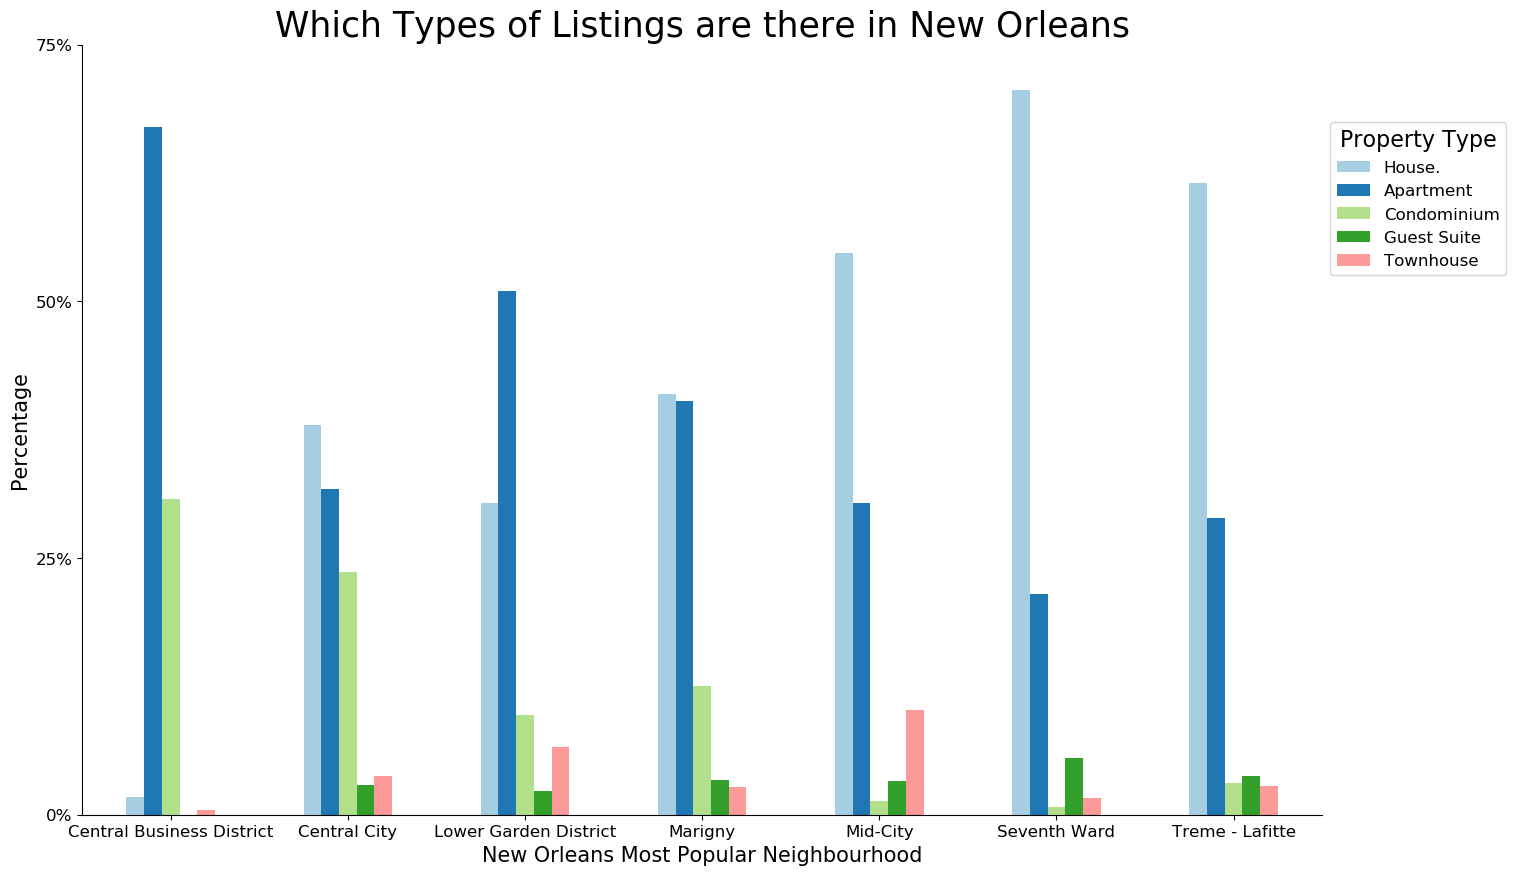

In [19]:
## Create bar chart showing property type % in 7 of the most listed neighbourhoods
q = most_listings
c = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99']

mylabels = ['House.','Apartment','Condominium','Guest Suite', 'Townhouse']
ax = pop_areas[['house_%', 'apartment_%', 'condominium_%', 'guest_suite_%', 
               'townhouse_%']].plot(kind = 'bar', color = c, figsize=(20,10))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(q, rotation='horizontal')
plt.title('Which Types of Listings are there in New Orleans', size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('New Orleans Most Popular Neighbourhood', size = 15)
plt.ylabel('Percentage', size = 15)
plt.yticks([0,25,50, 75], ['0%','25%','50%', '75%'])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(mylabels, loc = 'best', title = 'Property Type')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.8), labels = mylabels,  title = 'Property Type',
                title_fontsize=16, prop = dict(size = 12))
plt.show()

### Average Nightly Price per Property Type
The seventh graph explored shows the average nightly price per property type (5 most popular) in New Orleans.  The graph is titled "Boxplots of Price per Day of Property" and it uses the listings.csv.gz files found on the Inside Airbnb site. 

The data was loaded, and transformed. The 5 most popular property types are determined and the box plots are created using the seaborn library

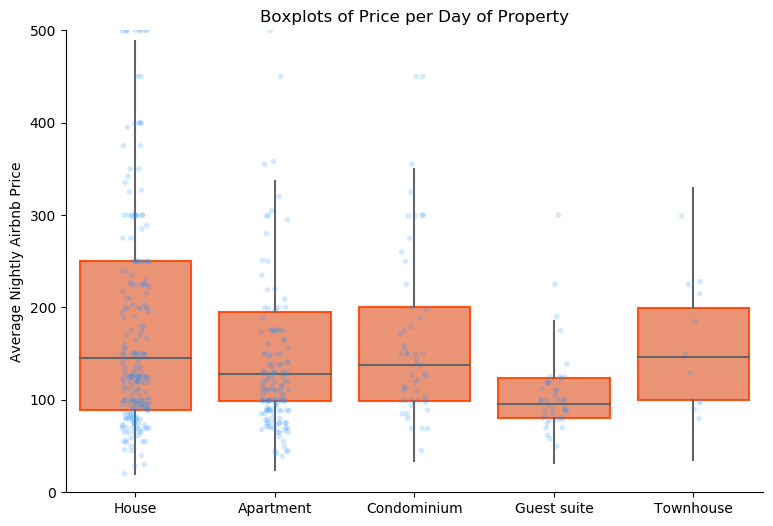

In [20]:
## Create data frame only containing property type and its respective price, to be used for plotting
prop_price = pd.concat([data['price'], data['property_type']], axis = 1)
prop_price_isin = prop_price['property_type'].isin(largest5)
prop_price = prop_price[prop_price_isin]

## Sample data frame to overlay data on the box plots
prop_price_sample = prop_price.sample(500)

## Create box plots
fig = plt.figure(1, figsize = (9, 6))
ax = fig.add_subplot(111)
bp = sns.boxplot(y = 'price', x = 'property_type', data = prop_price, order = largest5, 
                 fliersize = 0, showcaps = False, color = 'coral', 
                 boxprops = dict(edgecolor = 'orangered', alpha = 0.9))
bplot=sns.stripplot(y = 'price', x = 'property_type', data = prop_price_sample, jitter = True, marker = 'o', 
                    alpha = 0.2, order = largest5, color = 'dodgerblue', size = 4)
ax.set_ylim([0, 500]) 
plt.yticks(np.arange(0, 501, step=100))
plt.ylabel('Average Nightly Airbnb Price')
plt.xlabel('')
plt.title('Boxplots of Price per Day of Property')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### Neighbourhood Review Sentiment Analysis 
The eight graph explored shows the average sentiment  in each neighborhood of the New Orleans area. The sentiment analysis was conducted in RStudio. It looks at late 2019 year data to late 2020 year review data. The graph is titled "Which Neighborhoods have the Most Positive Reviews?" and it uses the listings.csv.gz and the neighbourhoods.geojson files found on the Inside Airbnb site. The sentiment scores range from +1.23 -  +2.40, with a higher score being a more positive review. 

The data was loaded, and transformed. The map is plotted using geopandas and the geojson containing the multipolygom that holds the latittude and longitude of each neighborhood. A function called "explode" is used to turn the multipolygom into a polygom so that each neighborhood name can be plotted exactly in the middle of the area it is named after. The darker blue the area in the chart is, the more "positive" the area is to stay in. Only neighborhoods with average sentiment score of 2.15 or above are labeled to avoid crowding.

In [21]:
sent_df = pd.read_csv('neighbourhood_avg_sentiments.csv')

sent_label = sent_df.drop(['sd_sentiment', 'number_listings', 'number_reviews'], axis = 1)
sent_label_df = p_label.set_index('neighbourhood').join(sent_label.set_index('neighbourhood'))
sent_label_df = sent_label_df.reset_index()
sent_label_df = sent_label_df[~sent_label_df['neighbourhood'].isin(drop_regions)]
single_sent_label_df = explode(sent_label_df)

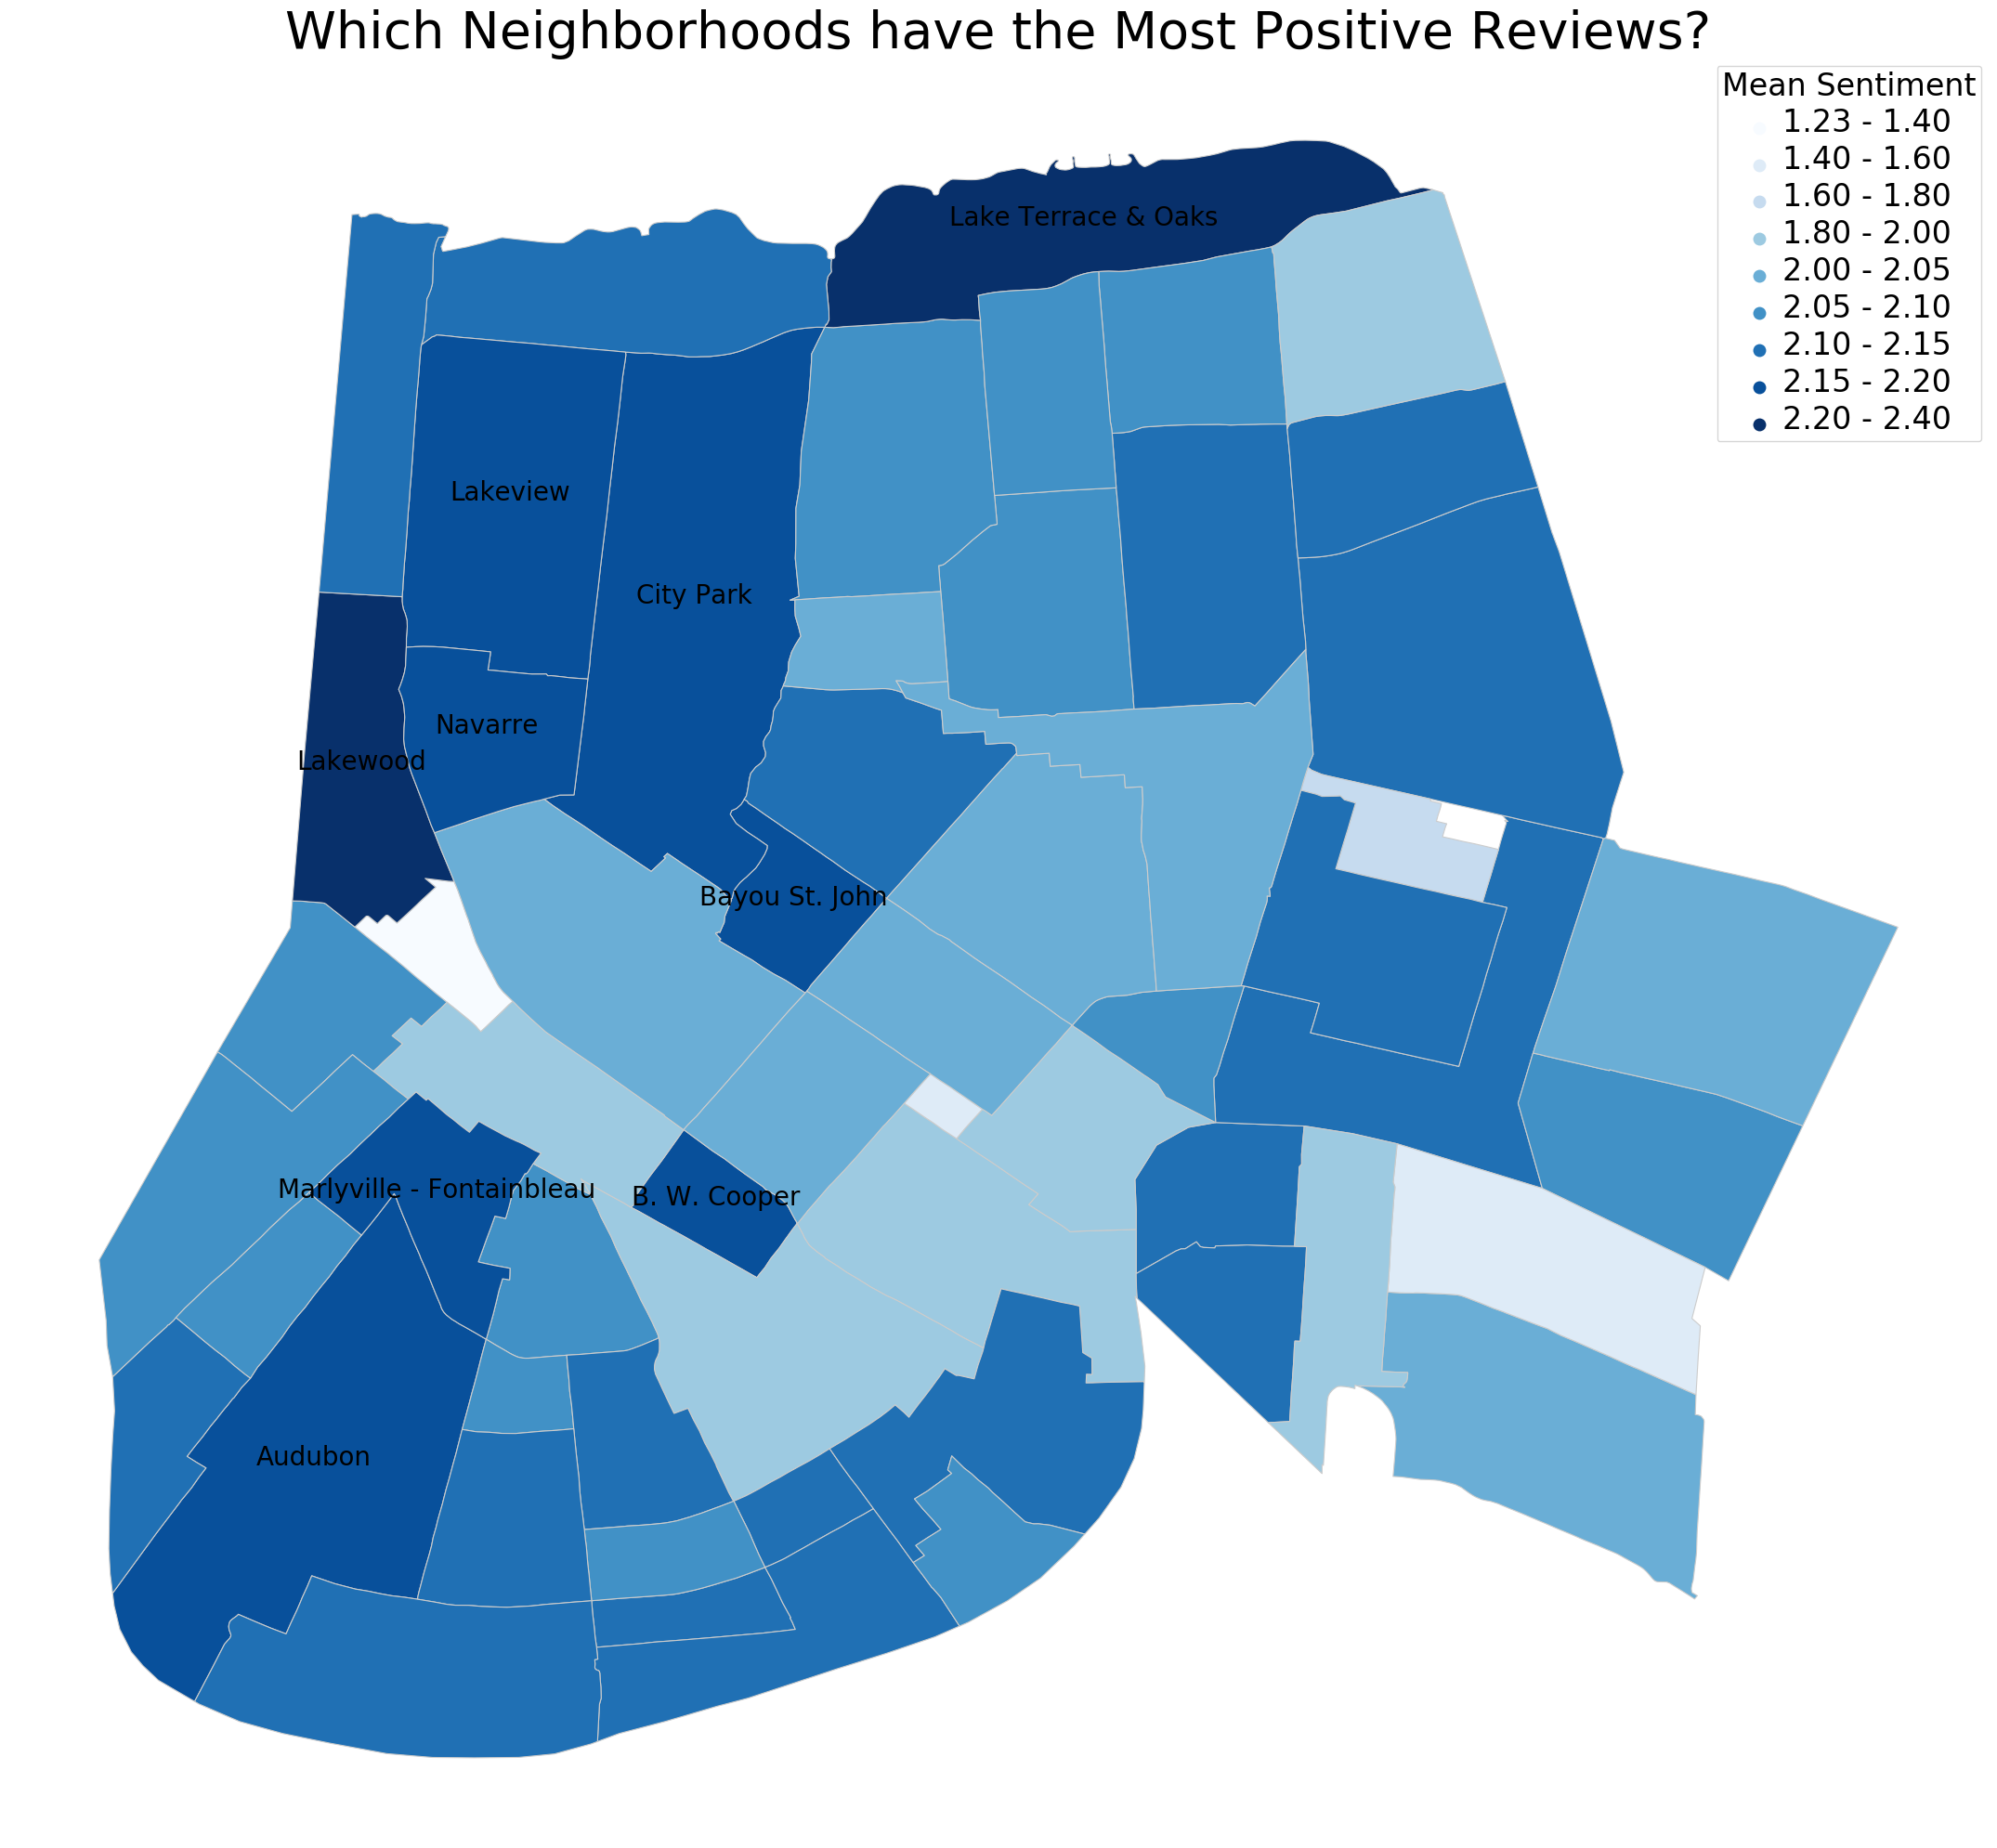

In [22]:
## Heat map of sentiment per neighborhood
fig, ax = plt.subplots(1, figsize = (40, 20))
ax.axis('off')
ax.set_title('Which Neighborhoods have the Most Positive Reviews?', fontdict = {'fontsize' : '40',
                                                                                  'fontweight' : '3'})
## Create normalized color bar
color = 'Blues'

## Create spacial map plot
ax = single_sent_label_df.plot('mean_sentiment_x', cmap = color, linewidth = 0.8, ax = ax, edgecolor = '0.8', figsize = (40,20),
            scheme = "User_Defined", legend = True,
            classification_kwds = dict(bins = [1.4, 1.6, 1.8, 2.0, 2.05, 2.1, 2.15, 2.2, 2.4]), 
            legend_kwds={'loc': 'upper right', 'title' : 'Mean Sentiment'})
plt.setp(ax.get_legend().get_texts(), fontsize='24')
plt.setp(ax.get_legend().get_title(), fontsize='24')

for idx, row in sent_label_df.iterrows():
    if(row['mean_sentiment'] > 2.15):
        plt.annotate(s=row['neighbourhood'], xy=row.geometry.centroid.coords[0], 
                                    ha='center', size = 20, color = 'black')
 
fig.tight_layout()
plt.show()

## Conclusion
New Orleans diverse history has shaped how people have settled and built out the city. Potential visitors have many choices in regards to how the want to ‘feel’ and explore the city. The French Quarter, the most infamous neighborhood, is built from historic French and Spanish architecture. This is the most exciting and most listed neighborhood in the dataset. Lakewood offers the most tranquil and luxurious stay in New Orleans with access to strolls along the Lakefront at sunset—or sunrise.

What I found most interesting about the Airbnb data for New Orleans was the relatively low occupancy rate during the summer months. Although there are peaks in demand in summer attributed to the Fourth of July weekend, in general, the summer seems quite empty for Airbnb properties. This might be because the overbearing +30 degree C heat and +80% humidity.

An interesting next step project would be to take the Airbnb listing image data and try to classify amenities that are recognized in each image to the list of the amenities the porperty owner lists as availble. This could help a user identify the model and type of toaster, oven, bed (size), etc... that might be available easier and quicker. 

## Further Reading
#### New Orleans
https://en.wikipedia.org/wiki/New_Orleans
https://www.neworleans.com/

#### Airbnb in New Orleans
https://nextcity.org/daily/entry/heres-what-new-orleans-looks-like-one-year-after-legalizing-airbnb
https://fortune.com/2019/11/30/new-orleans-cant-live-without-airbnb/

#### Inside Airbnb (Watchdog)
http://insideairbnb.com/
https://www.wired.com/2017/02/a-lone-data-whiz-is-fighting-airbnb-and-winning/

#### Chloropleth Map
https://www.arcgis.com/apps/MapJournal/index.html?appid=75eff041036d40cf8e70df99641004ca

#### Sentiment Analysis
https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python
https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17